<a href="https://colab.research.google.com/github/HanzalaWahid/JUPYTER-NOTEBOOK/blob/main/open_ended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch[10/1000] , Loss: 1.0423
Epoch[20/1000] , Loss: 0.9146
Epoch[30/1000] , Loss: 0.8304
Epoch[40/1000] , Loss: 0.7943
Epoch[50/1000] , Loss: 0.7600
Epoch[60/1000] , Loss: 0.7275
Epoch[70/1000] , Loss: 0.6961
Epoch[80/1000] , Loss: 0.6703
Epoch[90/1000] , Loss: 0.6495
Epoch[100/1000] , Loss: 0.6311
Epoch[110/1000] , Loss: 0.6173
Epoch[120/1000] , Loss: 0.6077
Epoch[130/1000] , Loss: 0.6010
Epoch[140/1000] , Loss: 0.5963
Epoch[150/1000] , Loss: 0.5928
Epoch[160/1000] , Loss: 0.5901
Epoch[170/1000] , Loss: 0.5880
Epoch[180/1000] , Loss: 0.5863
Epoch[190/1000] , Loss: 0.5849
Epoch[200/1000] , Loss: 0.5837
Epoch[210/1000] , Loss: 0.5827
Epoch[220/1000] , Loss: 0.5818
Epoch[230/1000] , Loss: 0.5811
Epoch[240/1000] , Loss: 0.5804
Epoch[250/1000] , Loss: 0.5799
Epoch[260/1000] , Loss: 0.5794
Epoch[270/1000] , Loss: 0.5789
Epoch[280/1000] , Loss: 0.5785
Epoch[290/1000] , Loss: 0.5782
Epoch[300/1000] , Loss: 0.5779
Epoch[310/1000] , Loss: 0.5776
Epoch[320/1000] , Loss: 0.5773
Epoch[330/1000] ,

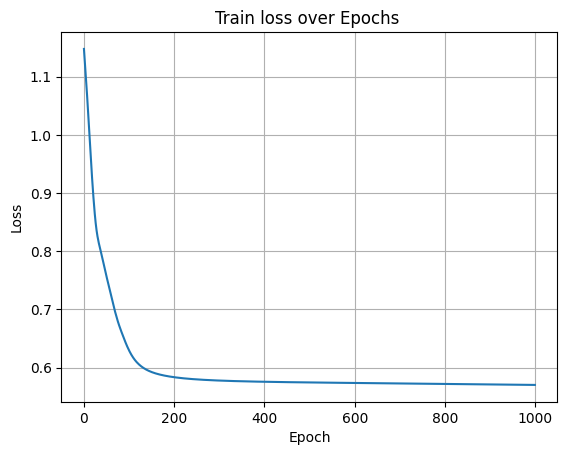

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris =  load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test , y_train , y_test = train_test_split(X , y  , test_size = 0.2 , random_state = 42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

class ANN(nn.Module):
  def __init__(self):
    super(ANN,self).__init__()
    self.fc1 = nn.Linear(4,10)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(10,3)
    self.softmax = nn.Softmax(dim =1)

  def forward (self , x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return self.softmax(out)

model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)


epochs = 1000
train_losses = []


for epoch in range(epochs):
  optimizer.zero_grad()
  outputs = model(X_train)
  loss = criterion(outputs , y_train)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  if (epoch  + 1 )% 10 == 0:
    print(f'Epoch[{epoch + 1 }/{epochs}] , Loss: {loss.item():.4f}')

with torch.no_grad():
  y_pred = model(X_test)
  predicted = torch.argmax(y_pred , dim =1)
  accuracy = accuracy_score(y_test , predicted)
  print(f"Accuracy on test data {accuracy * 100 :.2f}%")


plt.plot(train_losses)
plt.title("Train loss over Epochs ")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()